# 点阵字符聚类

In [5]:
import numpy as np

# 输入数据：六种不同点阵字体的字符数据集（48个字符，35维）
characters = [
    [0,1,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,1,1,1,0], # G
    [1,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,0,1,0,1,1,0,0,1,1,1,0,0,0,1,1,0,0,0,1], # N
    [0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0], # I
    [0,1,1,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,1,0,1,1,0,0,1,0,0,1,1,0,1], # Q
    [0,1,1,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,1,1,1,0], # O
    [1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,1,1,1,0], # U
    [1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1], # H
    [1,1,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,1], # Z
]

characters = np.array(characters * 6) # 重复六种字体

# SOFM 网络的参数
input_len = 35
output_len = 25
learning_rate = 0.6
learning_rate_decay = 0.01
iterations = 1000

# 初始化权重
weights = np.random.rand(output_len, input_len)

# 学习率和半径衰减
def decay(val, i, max_iter):
    return val * (1 - i / max_iter)

# 计算欧几里得距离
def euclidean_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

# 找到最匹配单元（BMU）
def find_bmu(sample, weights):
    distances = [euclidean_distance(sample, w) for w in weights]
    return np.argmin(distances)

# 更新权重
def update_weights(sample, bmu_index, weights, learning_rate, sigma):
    for i in range(len(weights)):
        distance_to_bmu = abs(i - bmu_index)
        if distance_to_bmu <= sigma:
            influence = np.exp(-(distance_to_bmu ** 2) / (2 * (sigma ** 2)))
            weights[i] += learning_rate * influence * (sample - weights[i])

# 训练 SOFM
for i in range(iterations):
    learning_rate_i = decay(learning_rate, i, iterations)
    sigma_i = decay(output_len / 2, i, iterations)
    for sample in characters:
        bmu_index = find_bmu(sample, weights)
        update_weights(sample, bmu_index, weights, learning_rate_i, sigma_i)

# 输出训练后的权重
print("No Topology Weights:")
print(weights)

# (2) 一维拓扑结构（重新初始化权重）
weights = np.random.rand(output_len, input_len)
for i in range(iterations):
    learning_rate_i = decay(learning_rate, i, iterations)
    sigma_i = decay(output_len / 2, i, iterations)
    for sample in characters:
        bmu_index = find_bmu(sample, weights)
        update_weights(sample, bmu_index, weights, learning_rate_i, sigma_i)

print("1D Topology Weights:")
print(weights)

# (3) 二维拓扑结构（重新初始化权重）
weights = np.random.rand(output_len, input_len)
for i in range(iterations):
    learning_rate_i = decay(learning_rate, i, iterations)
    sigma_i = decay(output_len / 2, i, iterations)
    for sample in characters:
        bmu_index = find_bmu(sample, weights)
        update_weights(sample, bmu_index, weights, learning_rate_i, sigma_i)

print("2D Topology Weights:")
print(weights)


No Topology Weights:
[[1.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  1.00000000e+000 1.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
  0.00000000e+000 0.00000000e+000 1.00000000e+000 1.00000000e+000
  1.09717269e-021 1.00000000e+000 1.09717269e-021 1.00000000e+000
  1.00000000e+000 0.00000000e+000 0.00000000e+000 1.00000000e+000
  1.00000000e+000 1.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 1.00000000e+000 1.00000000e+000 1.48219694e-323
  1.48219694e-323 1.48219694e-323 1.00000000e+000]
 [1.00000000e+000 4.94065646e-324 4.94065646e-324 4.94065646e-324
  1.00000000e+000 1.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 1.00000000e+000 1.00000000e+000 4.92022987e-001
  0.00000000e+000 0.00000000e+000 1.00000000e+000 1.00000000e+000
  5.07977013e-001 1.00000000e+000 5.07977013e-001 1.00000000e+000
  1.00000000e+000 0.00000000e+000 4.94065646e-324 4.92022987e-001
  1.

# 点阵数据集聚类

In [40]:
import numpy as np

row, col = 5, 5  
initial_eta = 0.6  
final_eta = 0.01  
num_iterations = 1000 

input_dim = 35
output_dim =25
w = np.random.rand(output_dim, input_dim) # weights matrix

def wta(x, w):
    distances = np.linalg.norm(w - x, axis=1)  
    return np.argmin(distances) 

# 无拓扑结构更新
def compete0(x, w, eta):
    for xx in x:
        id = wta(xx, w)
        w[id] = w[id] + eta * (xx - w[id])
    return w

# 一维邻域查找
def sofm_neighborid1(id, length=25):
    neighbors = [id]
    if id > 0:          neighbors.append(id - 1)  # 左邻居
    if id < length - 1: neighbors.append(id + 1)  # 右邻居
    return neighbors

# 一维拓扑结构更新
def sofm_compete1(x, w, eta, length=25):
    for xx in x:
        id = wta(xx, w)
        neighbors = sofm_neighborid1(id, length)
        for i in neighbors:
            w[i] += eta * (xx - w[i])  # 更新邻域内的权重
    return w

# 二维邻域查找
def sofm_neighborid2(id, row, col):
    rown, coln = id // col, id % col
    neighbors = [id]
    if coln > 0:        neighbors.append(id - 1)  # 左邻居
    if coln < col - 1:  neighbors.append(id + 1)  # 右邻居
    if rown > 0:        neighbors.append(id - col)  # 上邻居
    if rown < row - 1:  neighbors.append(id + col)  # 下邻居
    return neighbors

# 二维拓扑结构更新
def sofm_compete2(x, w, eta, row=5, col=5):
    for xx in x:
        id = wta(xx, w)
        neighbors = sofm_neighborid2(id, row, col)
        for i in neighbors:
            w[i] += eta * (xx - w[i])  # 更新邻域内的权重
    return w

In [35]:
# 动图生成类接口
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

class ImageSequenceGIF:
    def __init__(self, gif_dir='temp_gif_frames', gif_file='output.gif'):
        self.gif_dir = gif_dir
        self.gif_file = gif_file
        self.frames = []
        self.frame_count = 0

        if not os.path.exists(gif_dir):
            os.makedirs(gif_dir)

    def add_frame_from_plt(self, plt_figure=None):
        if plt_figure is None:
            plt_figure = plt.gcf()

        filename = os.path.join(self.gif_dir, f"frame_{self.frame_count:04d}.png")
        plt_figure.savefig(filename, bbox_inches='tight')
        self.frames.append(Image.open(filename))
        self.frame_count += 1
        plt.close(plt_figure)

    def save_gif(self, duration=100, last_frame_duration=200):
        if not self.frames:
            print("No frames to save.")
            return

        durations = [duration] * (len(self.frames) - 1) + [last_frame_duration]
        self.frames[0].save(
            self.gif_file,
            save_all=True,
            append_images=self.frames[1:],
            duration=durations,
            loop=0
        )
        print(f"GIF saved as {self.gif_file}")

    def clear_temp_frames(self):
        for f in os.listdir(self.gif_dir):
            os.remove(os.path.join(self.gif_dir, f))
        self.frames = []
        self.frame_count = 0

### 月牙数据

In [41]:
def gif1(datanum):
    x1 = np.linspace(-3, 3, datanum)
    noise = np.random.randn(datanum) * 0.15
    y1 = -np.square(x1) / 3 + 4.5 + noise

    x2 = np.linspace(0, 6, datanum)
    noise = np.random.randn(datanum) * 0.15
    y2 = np.square(x2 - 3) / 3 + 0.5 + noise

    plt.clf()
    plt.axis([-3.5, 6.5, -.5, 5.5])
    plt.scatter(x1, y1, s=10)
    plt.scatter(x2, y2, s=10)
    plt.draw()
    gif_maker.add_frame_from_plt(plt.gcf())  

gif_maker = ImageSequenceGIF(gif_dir='temp_gif_frames', gif_file='C:\\Users\\ma\\Desktop\\新建文件夹\\人工神经网络\\第三次作业\\yueya.gif')

for _ in range(20):
    gif1(300)

gif_maker.save_gif(duration=100, last_frame_duration=500)


gif_maker.clear_temp_frames()

GIF saved as C:\Users\ma\Desktop\新建文件夹\人工神经网络\第三次作业\yueya.gif


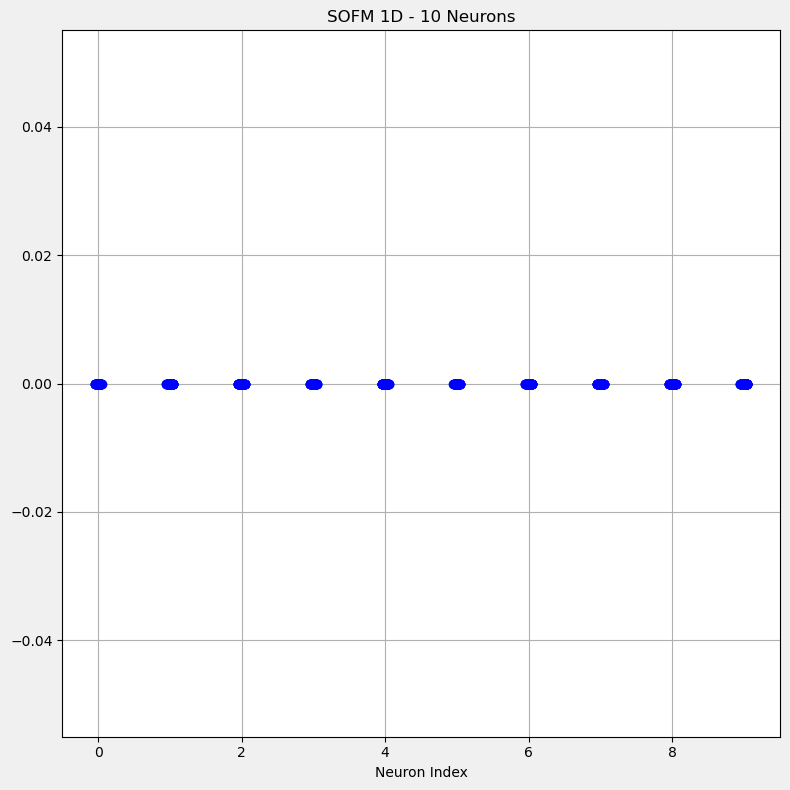

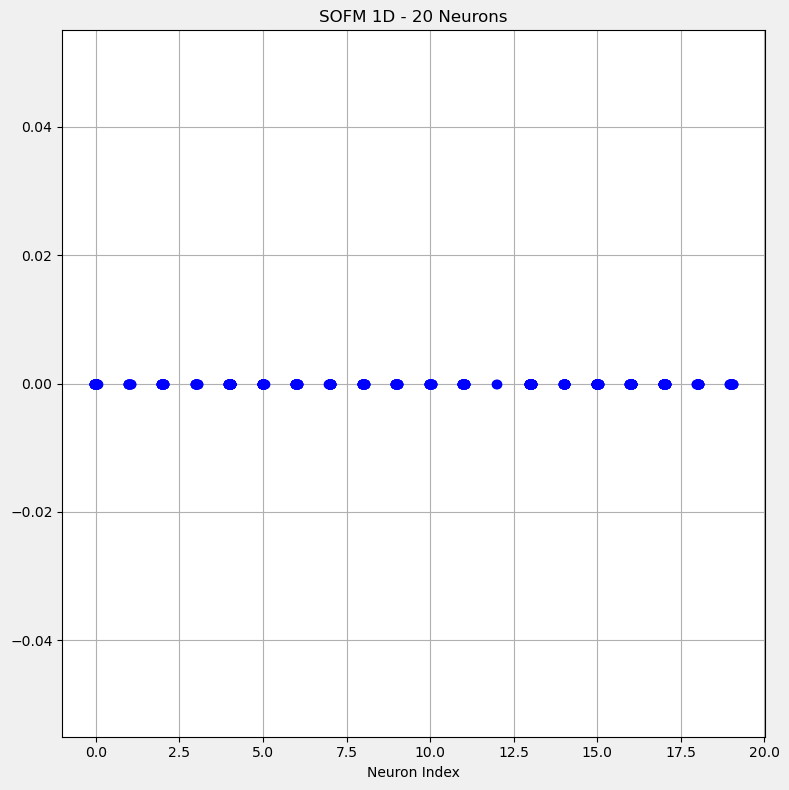

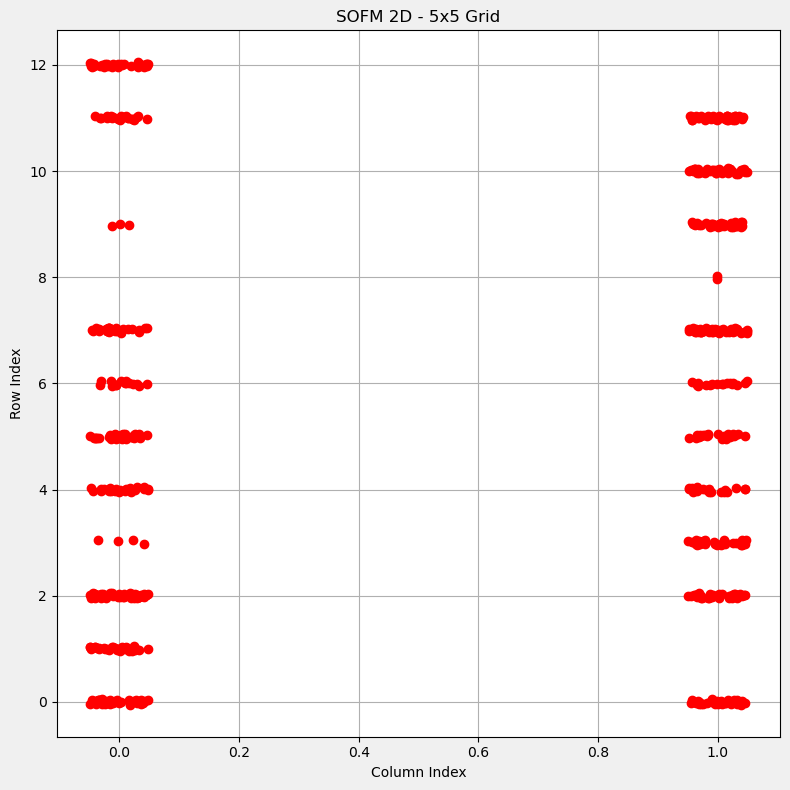

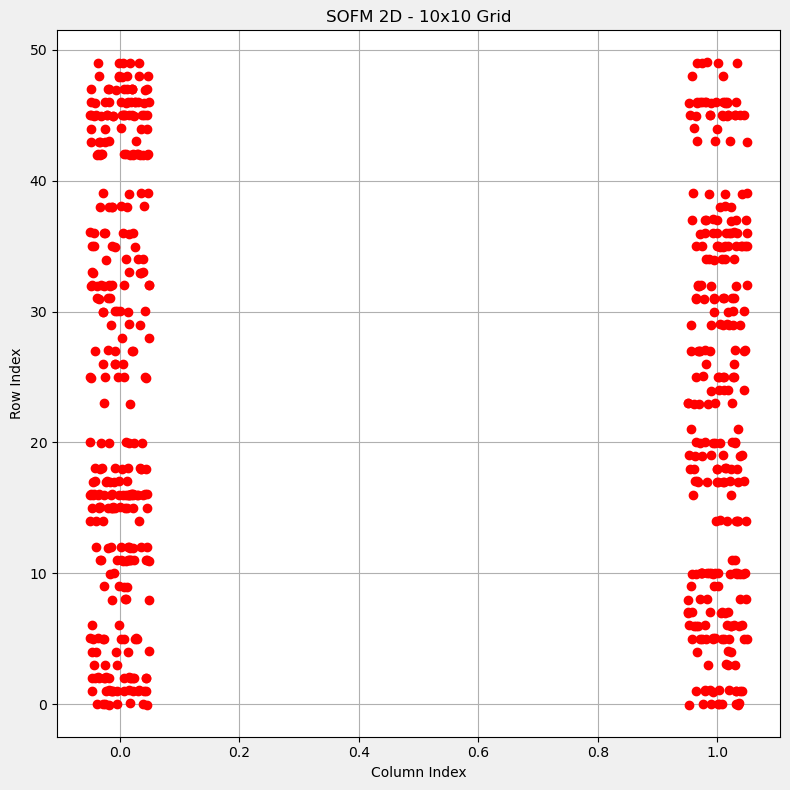

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def gif1_data(datanum=300):
    x1 = np.linspace(-3, 3, datanum)
    noise1 = np.random.randn(datanum) * 0.15
    y1 = -np.square(x1) / 3 + 4.5 + noise1
    data1 = np.column_stack((x1, y1))

    x2 = np.linspace(0, 6, datanum)
    noise2 = np.random.randn(datanum) * 0.15
    y2 = np.square(x2 - 3) / 3 + 0.5 + noise2
    data2 = np.column_stack((x2, y2))

    return np.vstack((data1, data2))
data = gif1_data(300)

input_dim = data.shape[1]  
learning_rate = 0.5
epochs = 1000

def plot_som_result(data_points, weight_matrix, topology, plot_title):
    plt.figure(figsize=(8, 8), facecolor='#f0f0f0')  # Set background color
    colors = {'1D': 'blue', '2D': 'red'}
    markers = {'1D': 'o', '2D': 'o'}
    add_jitter = lambda: np.random.uniform(-0.05, 0.05)  # Reduce jitter for better clarity

    for data_point in data_points:
        closest_neuron = wta(data_point, weight_matrix)
        if topology == '1D':
            plt.plot(closest_neuron + add_jitter(), 0, markers['1D'], color=colors['1D'])
        elif topology == '2D':
            row_index, col_index = divmod(closest_neuron, weight_matrix.shape[1])
            plt.plot(col_index + add_jitter(), row_index + add_jitter(), markers['2D'], color=colors['2D'])

    plt.title(f'SOFM {plot_title}')
    plt.xlabel("Neuron Index" if topology == '1D' else "Column Index")
    plt.ylabel("" if topology == '1D' else "Row Index")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


neuron_configs = {
    '1D - 10 Neurons': (10, '1D', sofm_compete1),
    '1D - 20 Neurons': (20, '1D', sofm_compete1),
    '2D - 5x5 Grid': ((5, 5), '2D', sofm_compete2),
    '2D - 10x10 Grid': ((10, 10), '2D', sofm_compete2)
}

for title, (neurons, topology, compete_fn) in neuron_configs.items():
    if topology == '1D':
        w = np.random.rand(neurons, input_dim)
        for epoch in range(epochs):
            eta = learning_rate * (1 - epoch / epochs)
            w = compete_fn(data, w, eta, length=neurons)
    elif topology == '2D':
        w = np.random.rand(neurons[0] * neurons[1], input_dim)
        for epoch in range(epochs):
            eta = learning_rate * (1 - epoch / epochs)
            w = compete_fn(data, w, eta, row=neurons[0], col=neurons[1])
    
    # 可视化训练结果
    plot_som_result(data, w, topology, title)